<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/algo/tarea-gradiente-vector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TAREA   
Una implementación mas eficiente de La regresión lineal ya sea uni o multivariable se puede hacer mefiante operaciones vectoriales con numpy.



In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

data1 = pd.read_csv('https://drive.google.com/uc?id=1JyEVQ0k57fNzl9ZJJn0rJdHqu7K5cJ3-')

Para la recgresion lineal univariable, solo tenemos una característica de entrada x₁. Introduciremos otra característica x₀=1 para todos los ejemplos de entrenamiento, simplemente para facilitar los cálculos. Por lo tanto, el modelo de regresión lineal se puede formular de la siguiente manera:  
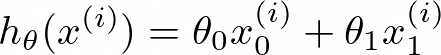


La regresión lineal utiliza el error cuadrático medio como función de coste, que se escribe de la siguiente manera pra $m$ ejemplos:



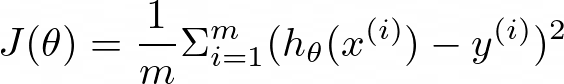

En cada iteración, calculamos el gradiente de J(θ) con respecto a todos los parámetros $\theta_0$ y $\theta1$.
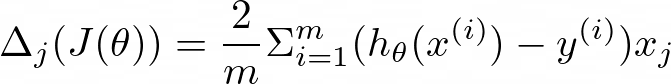

Los pasos anteriores se pueden realizar de una sola vez usando NumPy y la notación vectorizada de la siguiente manera:
Nota: Si tomamos $\theta$ como vector columna, entonces se escribe $θ^{T}X$

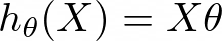

El vector de gradiente se calcula de la siguiente manera: DEMOSTRAR  
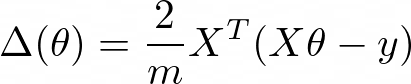

Finalmente actualizamos los parámetros del modo siguiente:  

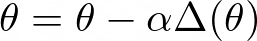

##TAREA: Implementar una solución vectorizada utilizando el gradiente descendente para regresión lineal univariable, que luego servirá tambiñen para el caso multivariable.

In [ ]:
def cost_function(X, y, theta):
    """
    cost_function(X, y, theta) computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y
    """
    ## number of training examples
    m = len(y)

    ## Calculate the cost with the given parameters
    J = np.sum((X.dot(theta)-y)**2)/2/m

In [ ]:
def vector_gradient_descent(X, y, theta, alpha, iterations):
    """
    gradient_descent Performs gradient descent to learn theta
    theta = GRADIENTDESENT(X, y, theta, alpha, num_iters) updates theta by
    taking num_iters gradient steps with learning rate alpha
    """
    cost_anterior = computeCost(X, y, theta)
    convergencia = False
    m= len(X)
    for i in range(iterations):
        hypothesis = X.dot(theta)
        loss = hypothesis-y
        gradient = X.T.dot(loss)/m
        theta = theta - alpha*gradient
        cost_actual = computeCost(X, y, theta)
        if(abs(cost_actual -cost_anterior)< epsilon):
          convergencia = True
          break
        cost_anterior = cost_actual
    if(convergencia == True):
      print("Convergencia alcanzada en %d",i)
      return theta
    else:
      print("Convergencia NO alcanzada en %d iteraciones",i)
    return theta

In [ ]:
print(x.shape, y.shape, theta.shape)
print(x[0:3,])

(15, 2) (15, 1) (2, 1)
[[1.   1.47]
 [1.   1.5 ]
 [1.   1.52]]


In [ ]:
print(x.T)

[[1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.  ]
 [1.47 1.5  1.52 1.55 1.57 1.6  1.63 1.65 1.68 1.7  1.73 1.75 1.78 1.8
  1.83]]


In [ ]:
computeCost(x, y, theta)

np.float64(1949.9514633333333)

In [ ]:
iterations = 10000000
alpha = 0.01
epsilon = 0.000000001
n = len(data1.columns)-1
theta = np.matrix(np.zeros((2, 1)))
print(theta)

[[0.]
 [0.]]


In [ ]:
theta_actual =  vector_gradient_descent(x, y, theta, alpha, iterations)
print(theta_actual)

Convergencia alcanzada en %d 199553
[[-38.9789771 ]
 [ 61.22208065]]


In [ ]:
betaHat = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
print('coefficients: \n')
print(betaHat)

coefficients: 

[[-39.06195592]
 [ 61.27218654]]


In [ ]:
gradients = 2/num_examples * X_b.T.dot(X_b.dot(theta) - y)
    prediction = np.dot(X_b, theta)
    error = prediction - y
    cost = 1/(2*num_examples) * np.dot(error.T,error) #np.dot(error.T,error) to calculate sqaured errors
    past_costs.append(cost)
    theta = theta - alpha * gradients # update parameters


In [ ]:
def batchGD(X_b, y, theta, num_examples, num_iterations, alpha):
  plt.figure()
  past_costs = []
  past_thetas = [theta] # originally our initial values
  past_slopes = []
  past_biases = []
  plt.scatter(X,y, marker='o') # makes the base plot
  for iteration in range(num_iterations):
    gradients = 2/num_examples * X_b.T.dot(X_b.dot(theta) - y)
    prediction = np.dot(X_b, theta)
    error = prediction - y
    cost = 1/(2*num_examples) * np.dot(error.T,error) #np.dot(error.T,error) to calculate sqaured errors
    past_costs.append(cost)
    theta = theta - alpha * gradients # update parameters
    past_thetas.append(theta)
    past_slopes.append(theta[1])
    past_biases.append(theta[0])
    plot_data(X_b, y, theta)
    plt.title(f'Linear Regression with batch gradient descent with alpha = {alpha}')
  return past_thetas, past_costs, past_slopes, past_biases
    # plt.show()

In [ ]:
def gradientDescent1(x, theta, max_iter,epsilon = 10e-5):
    """


    m = len(x)
    J_vals = []
    prev = math.inf
    for i in range(max_iter):
        error = ((x * theta) - y)
        for j in range(len(theta.flat)):
            theta.T[0, j] = theta.T[0, j] - (alpha/m) * np.sum(np.multiply(error, x[:, j]))
        J_vals.append(computeCost(x, y, theta))
        if(abs( J_vals[i]- prev) < epsilon) :
            print("Convergencia Alcanzada !", i ," iteraciones")
            break
        prev = J_vals[i]
    return (theta, J_vals,i)

In [ ]:
print(x[0:3,])

0    1.47
1    1.50
2    1.52
Name: Height, dtype: float64


In [ ]:
unos = np.ones(len(x))
A = np.column_stack((x,unos))
print('Matriz A\n',A[0:3,])

Matriz A
 [[1.47 1.  ]
 [1.5  1.  ]
 [1.52 1.  ]]


In [ ]:
c = np.dot(np.linalg.inv(np.dot(A.T,A)),np.dot(A.T,y))
print('Vector  c \n',c)

Vector  c 
 [ 61.27218654 -39.06195592]


In [ ]:
c1 = c[0]
c2 = c[1]
y_calc = c1*x+c2
suma_errores = np.sum((y-y_calc)**2)
print(suma_errores)

7.490558403882581


In [ ]:
print(suma_errores/len(x))

0.4993705602588387
